<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 

Author: [Yury Kashnitsky](https://yorko.github.io). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center> Topic 2. Visual data analysis
## <center>Practice. Analyzing "Titanic" passengers.

**Fill in the missing code ("You code here"). No need to select answers in a webform.**

**<a href="https://www.kaggle.com/c/titanic">Competition</a> Kaggle "Titanic: Machine Learning from Disaster".**

In [1]:
%config Completer.use_jedi = True
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

**Read data**

In [2]:
df = pd.read_csv("../../../data/coursea_data.csv")
df = df.drop(df.columns[[0]], axis=1)
df['course_students_enrolled']=df['course_students_enrolled'].replace({'k': '*1e3', 'm': '*1e6'}, regex=True).map(pd.eval).astype(int)

In [3]:
df.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5300
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17000
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130000
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91000
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320000


In [4]:
df.describe(include="all")

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
count,891,891,891,891.000000,891,8.910000e+02
unique,888,154,3,NaN,4,NaN
top,Developing Your Musicianship,University of Pennsylvania,COURSE,NaN,Beginner,NaN
freq,2,59,582,NaN,487,NaN
mean,NaN,NaN,NaN,4.677329,NaN,9.055208e+04
std,NaN,NaN,NaN,0.162225,NaN,1.819365e+05
min,NaN,NaN,NaN,3.300000,NaN,1.500000e+03
25%,NaN,NaN,NaN,4.600000,NaN,1.750000e+04
50%,NaN,NaN,NaN,4.700000,NaN,4.200000e+04
75%,NaN,NaN,NaN,4.800000,NaN,9.950000e+04


In [5]:
df[df["course_title"].duplicated(keep=False)]

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
224,Developing Your Musicianship,Berklee College of Music,COURSE,4.8,Mixed,41000
225,Developing Your Musicianship,Berklee College of Music,SPECIALIZATION,4.8,Beginner,54000
563,Machine Learning,University of Washington,SPECIALIZATION,4.6,Intermediate,290000
564,Machine Learning,Stanford University,COURSE,4.9,Mixed,3200000
582,Marketing Digital,Universidade de São Paulo,COURSE,4.8,Beginner,81000
583,Marketing Digital,Universidad Austral,SPECIALIZATION,4.7,Beginner,39000


In [6]:
df["course_organization"].unique()

array(['(ISC)²', 'University of Pennsylvania', 'Johns Hopkins University',
       'Yale University', 'Indian School of Business',
       'University at Buffalo', 'deeplearning.ai', 'IBM',
       'Amazon Web Services', 'University of Toronto',
       'University of California, Irvine',
       'University of Illinois at Urbana-Champaign',
       'University of Michigan',
       'Universidad Nacional Autónoma de México',
       'University of Colorado Boulder',
       'National Research University Higher School of Economics',
       'Google Cloud', 'Erasmus University Rotterdam', 'Duke University',
       'University of Virginia', 'Atlassian', 'ScrumTrek',
       'University of California San Diego', 'Stanford University',
       'University of Colorado System', 'Copenhagen Business School',
       'Macquarie University', 'Vanderbilt University',
       'The University of Edinburgh',
       'Technical University of Denmark (DTU)', 'Universidad Austral',
       'Arizona State University', 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   course_title              891 non-null    object 
 1   course_organization       891 non-null    object 
 2   course_Certificate_type   891 non-null    object 
 3   course_rating             891 non-null    float64
 4   course_difficulty         891 non-null    object 
 5   course_students_enrolled  891 non-null    int32  
dtypes: float64(1), int32(1), object(4)
memory usage: 38.4+ KB


In [8]:
train,test=train_test_split(df,test_size=0.2)
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 390 to 741
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   course_title              712 non-null    object 
 1   course_organization       712 non-null    object 
 2   course_Certificate_type   712 non-null    object 
 3   course_rating             712 non-null    float64
 4   course_difficulty         712 non-null    object 
 5   course_students_enrolled  712 non-null    int32  
dtypes: float64(1), int32(1), object(4)
memory usage: 36.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 69 to 392
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   course_title              179 non-null    object 
 1   course_organization       179 non-null    object 
 2   course_Certificate_type   179 non-null    object 
 3   course

In [9]:
train.shape

(712, 6)

**1. Build a picture to visualize all scatter plots for each pair of features**

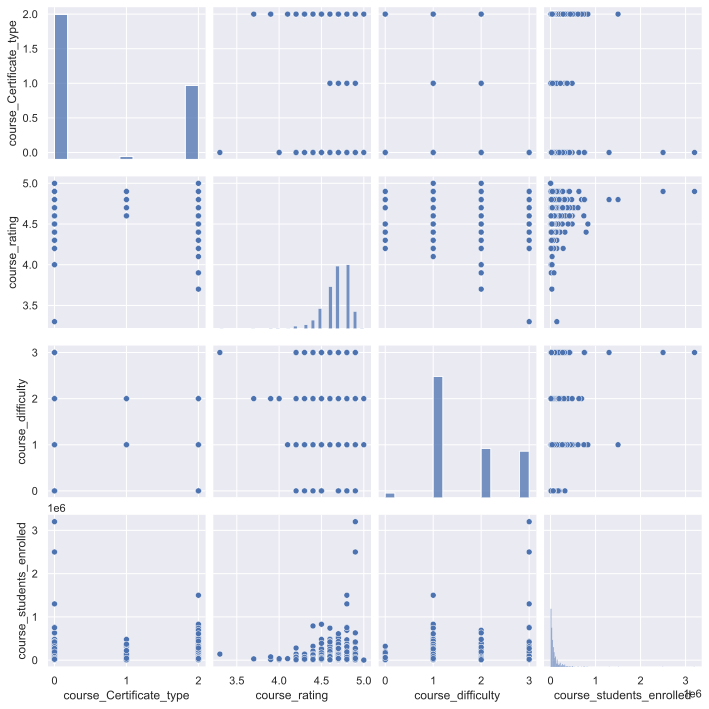

In [10]:
df2=df
df2[["course_difficulty","course_Certificate_type"]]=df2[["course_difficulty","course_Certificate_type"]].apply(preprocessing.LabelEncoder().fit_transform)
sns.pairplot(df2);

**2. How does student enrollment(`course_students_enrolled`) depend on course difficulty`? Build a boxplot.**

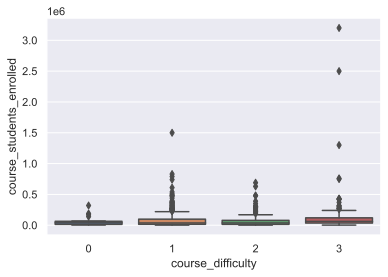

In [11]:
sns.boxplot(x="course_difficulty", y="course_students_enrolled", data=df);

**3. Let's build the same plot but restricting values of `course_students_enrolled` to be less than 95% quantile of the initial vector (to drop outliers that make the plot less clear).**

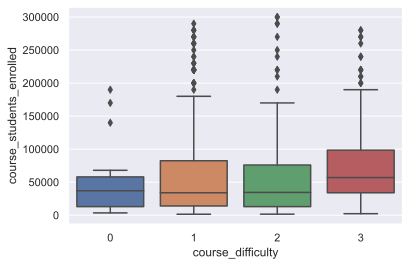

In [12]:
sns.boxplot(
    x="course_difficulty",
    y="course_students_enrolled",
    data=df[df["course_students_enrolled"] < df["course_students_enrolled"].quantile(0.95)],
);

**4. How is the course difficulty dependent on course certification type? Depict it with `Seaborn.countplot` using the `hue` argument.**

In [13]:
pd.crosstab(df["course_Certificate_type"], df["course_difficulty"])

course_difficulty,0,1,2,3
course_Certificate_type,,,,
0,9,282,104,187
1,0,9,3,0
2,10,196,91,0


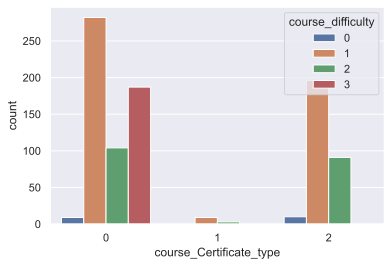

In [14]:
sns.countplot(x="course_Certificate_type", hue="course_difficulty", data=df);

**5. Depict how the distribution of student enrollment depends on course rating courses withit with `Seaborn.boxplot`**

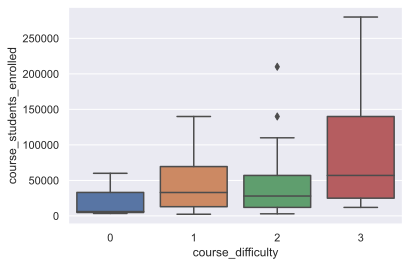

In [15]:
temp1=df["course_students_enrolled"] < df["course_students_enrolled"].quantile(0.95)
temp2=df["course_rating"] < 4.5
sns.boxplot(x="course_difficulty", y="course_students_enrolled", data=df[temp1&temp2]);

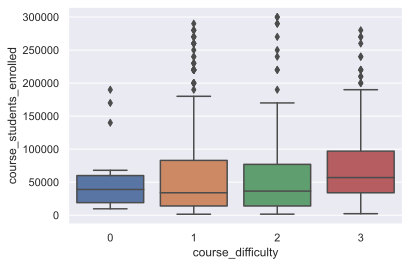

In [16]:
sns.boxplot(x="course_difficulty", y="course_students_enrolled", data=df[temp1&(~temp2)]);

## Useful resources
* The same notebook as an interactive web-based [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-2-practice-solution)
* Topic 2 "Visual data analysis in Python" as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-2-visual-data-analysis-in-python)
* Main course [site](https://mlcourse.ai), [course repo](https://github.com/Yorko/mlcourse.ai), and YouTube [channel](https://www.youtube.com/watch?v=QKTuw4PNOsU&list=PLVlY_7IJCMJeRfZ68eVfEcu-UcN9BbwiX)